TensorFlow is an open source library developed by Google

It can run on either CPU or GPU, but Neural Networks are usually much faster on GPU.

The basic idea of TensorFlow is to create data flow graphs

These graphs have nodes and edges to represent the design of neural nets

The arrays (data) passed along from layer of nodes to layer of nodes is known as a Tensor

There are two ways to use TensorFlow:

-- Customizable graph session

-- Sci-Kit Learn type interface with Contrib.Learn

This bootcamp will utilize Contrib.Learn 

In [1]:
import tensorflow as tf

C:\Users\casey\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# constants in tensorflow are stored in tensor objects

hello = tf.constant('Hello World')
type(hello)

tensorflow.python.framework.ops.Tensor

In [5]:
x = tf.constant(100)

In [6]:
x

<tf.Tensor 'Const_2:0' shape=() dtype=int32>

In [7]:
# sessions are a class for running tensorflow operations - environment where operations are conducted

sess = tf.Session()

In [8]:
sess.run(hello) # b is just a unicode indication

b'Hello World'

In [9]:
sess.run(x)

100

In [10]:
type(sess.run(x))

numpy.int32

In [11]:
# Tensorflow Operations

x = tf.constant(2)
y = tf.constant(3)

In [15]:
with tf.Session() as sess:
    print('Operations with Constants')
    print(sess.run(x + y))
    print(sess.run(x - y))
    print(sess.run(x * y))
    print(sess.run(x ** y))

Operations with Constants
5
-1
6
8


In [16]:
# another object type in Tensorflow is a Placeholder

x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [20]:
# now that we have placeholders, we can define operations with variable inputs (last one used constant input)

add = tf.add(x,y)
sub = tf.subtract(x,y)
mult = tf.multiply(x,y)

In [22]:
with tf.Session() as sess:
    print('Operations with Placeholders')
    print(sess.run(add, feed_dict = {x:20, y:30})) 
    print(sess.run(sub, feed_dict = {x:20, y:30})) 
    print(sess.run(mult, feed_dict = {x:20, y:30})) 
    
# second argument is feed_dict - pass in dictionary as keys, not strings

Operations with Placeholders
50
-10
600


In [23]:
# can also use a dictionary object and pass that in

d = {x:20, y:30}

with tf.Session() as sess:
    print('Operations with Placeholders')
    print(sess.run(add, feed_dict = d)) 
    print(sess.run(sub, feed_dict = d)) 
    print(sess.run(mult, feed_dict = d)) 


Operations with Placeholders
50
-10
600


In [24]:
# matrix multiplication 

import numpy as np

In [31]:
# opposite shapes allows for matrix multiplication 
# a has double brackets around both values to make it 1 x 2 and b has brackets around each value to make it 2 x 1

a = np.array([[5.0, 5.0]])
b = np.array([[2.0], [2.0]])

In [32]:
a.shape

(1, 2)

In [33]:
b.shape

(2, 1)

In [35]:
# convert to tensorflow constants

mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [36]:
# create matrix multiplication object

matrix_multi = tf.matmul(mat1, mat2)

In [37]:
with tf.Session() as sess:
    result = sess.run(matrix_multi) 
    print(result)
    
# don't need dictionary because they've already been passed into matrix_multi as mat1 and mat2

[[20.]]


In [38]:
# moving onto MNIST data set

# data contains handwritten numbers between 0 and 9 with a collection of arrays representing their pixels

In [42]:
import os
os.chdir('C:\\Users\\casey\\Downloads\\Python-Data-Science-and-Machine-Learning-Bootcamp-master\\Deep Learning')

In [43]:
from tensorflow.examples.tutorials.mnist import input_data

In [44]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

# one_hot = True means that target or label are one hot encoded

# this will make the possible answers an array of  values representing 0-9 where 1 signifies the correct answer

# ([0, 0, 0, 0, 1, 0, 0, 0, 0, 0]) is the 5th position, which means the number was a 4

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [45]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [47]:
mnist.train.images.shape # 55000 images, 784 pixels per image

(55000, 784)

In [48]:
mnist.train.num_examples # confirmed 55000 training examples

55000

In [49]:
mnist.test.num_examples # 10000 in testing set

10000

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [54]:
mnist.train.images[1].shape

(784,)

In [55]:
# need to convert this data to a 28 x 28 dataset

mnist.train.images[1].reshape(28, 28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

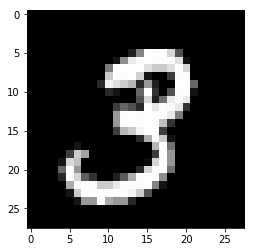

In [57]:
# visualize

plt.imshow(mnist.train.images[1].reshape(28, 28), cmap = 'gist_gray')

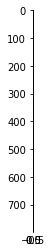

In [58]:
# we are going to use a version similar to the original form for the model

plt.imshow(mnist.train.images[1].reshape(784, 1)) # can't really visualize because all values are along 1 vector

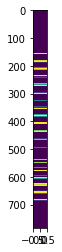

In [59]:
plt.imshow(mnist.train.images[1].reshape(784, 1), aspect=0.02) # better now

In [60]:
# modeling data

# first argument takes in data type expected for training data

# shape argument takes in batch sizes - we put None because we don't know batch size yet

x = tf.placeholder(tf.float32, shape = [None, 784])

In [61]:
# finding weights

# shape for variable is 784 x 10 because there are 784 predictors and 10 different possible answers

W = tf.Variable(tf.zeros([784, 10]))

In [62]:
# biases

b = tf.Variable(tf.zeros([10]))

In [63]:
# note how second shape of x and first shape of W match, as well as second shape in weights and bias shape

In [64]:
# create graph

# this follows deep learning equation video - matrix multiply x (model) and W (weights) and add bias

y = tf.matmul(x, W) + b

In [65]:
# create loss and optimizer

# y_true is where we will pass in correct labels and compare against predictions

# note that shape [None, 10] directly relates to one hot encoding and 10 possible answers

y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [66]:
# cross entropy

# cross entropy will take care of the mathematics of running the gradient descent optimizer and minimizing error

# labels are the actual answer, logits are our predictions

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits = y))

In [67]:
# create optimizer for training model

# this is where we can adjust the learning rate - starting with 0.5

# higher rate = faster learning but generally worse results - no way to know off the bat which rate is best

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)

In [68]:
# train model

# the optimizer is the method for how you are trying to reduce error, and cross entropy is used to define error

# essentially saying grab this optimizer and minimize this particular error

train = optimizer.minimize(cross_entropy)

In [69]:
# initiate session

init = tf.global_variables_initializer()

In [72]:
with tf.Session() as sess:

    sess.run(init)
    
    for step in range(1000):
        
        batch_x, batch_y = mnist.train.next_batch(100) # grab batches of 100 and unpack their x and y values
        
        sess.run(train, feed_dict = {x:batch_x, y_true:batch_y}) # note that x and y_true correspond to placeholders
        
    matches = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1)) # where do predictions = labels
    
    acc = tf.reduce_mean(tf.cast(matches, tf.float32)) # accuracy calculation
    
    print(sess.run(acc, feed_dict = {x:mnist.test.images, y_true:mnist.test.labels}))

0.9161


In [74]:
# this was a complicated way to develop a model that goes through each step

# next we will explore estimators that automate much of this process

#### Estimators can quickly create models without needing to manually define a graph

Estimator steps:

1. read in data and normalize if necessary

2. train / test split the data

3. create estimator feature columns

4. create input estimator function

5. train estimator model

6. predict with new test input function

In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('iris.csv')

In [77]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [78]:
# column names cannot have any spaces or special characters 

# also target column needs to be an integer

df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [79]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [80]:
df['target'] = df['target'].apply(int)

In [81]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
# train test split

X = df.drop('target', axis = 1)
y = df['target']

In [83]:
from sklearn.cross_validation import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
# create feature columns

# we use feature_column.numeric_column but there are also other ways to do categorical columns

feat_cols = []

for col in X.columns:
    feat_cols.append(tf.feature_column.numeric_column(col))

In [86]:
feat_cols

[_NumericColumn(key='sepal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='sepal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_length', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='petal_width', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [104]:
# create input function with training data

# can play around with batch size number - don't want to make it too big or it can crash session
# make smaller when lots of predictions come back as None

# num epochs signifies when you have gone through all your training data - in this case 5 times through

in_func = tf.estimator.inputs.pandas_input_fn(x = X_train , y = y_train, batch_size = 10, num_epochs=5, shuffle = True)

In [137]:
# now we create the actual estimator with Deep Neural Net classifier (DNNClassifier)

# hidden_units passes in a list of layers with number of neurons in each layer

# n_classes = 3 means there are 3 possible answers (one for each flower type)

# for feature_columns we pass in the object we previously created (feat_cols)

classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes = 3, feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\casey\\AppData\\Local\\Temp\\tmpul7jyc5n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002140AEEE518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [138]:
# train the classifier

# pass in the input function previously created

# can play around with steps number

classifier.train(input_fn = in_func, steps = 50)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\casey\AppData\Local\Temp\tmpul7jyc5n\model.ckpt.
INFO:tensorflow:loss = 10.564732, step = 1
INFO:tensorflow:Saving checkpoints for 50 into C:\Users\casey\AppData\Local\Temp\tmpul7jyc5n\model.ckpt.
INFO:tensorflow:Loss for final step: 1.9494247.


In [139]:
# predict values

pred_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = len(X_test), shuffle = False)

In [140]:
# since classifier.predict is just a generator, you need to wrap it in a list

pred = list(classifier.predict(input_fn=pred_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\casey\AppData\Local\Temp\tmpul7jyc5n\model.ckpt-50
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [141]:
# pred is a list of dictionaries

# includes class predictions, probabilities of being in each class, and more

pred

[{'logits': array([-2.8232205 ,  1.3978179 ,  0.05232818], dtype=float32),
  'probabilities': array([0.01151552, 0.7842549 , 0.20422953], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([ 4.908005  , -0.96630925, -2.8493295 ], dtype=float32),
  'probabilities': array([9.967721e-01, 2.801648e-03, 4.262145e-04], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-7.1788173 ,  0.64154387,  4.178992  ], dtype=float32),
  'probabilities': array([1.1347731e-05, 2.8264981e-02, 9.7172374e-01], dtype=float32),
  'class_ids': array([2], dtype=int64),
  'classes': array([b'2'], dtype=object)},
 {'logits': array([-2.9803796 ,  1.3510277 ,  0.26658458], dtype=float32),
  'probabilities': array([0.00973109, 0.7400615 , 0.2502074 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-2.8312187 ,  1.53

In [142]:
# create list of predictions

final_preds = []

for p in pred:
    final_preds.append(p['class_ids'][0])

In [143]:
final_preds

[1,
 0,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0]

In [144]:
# evaluate model

from sklearn.metrics import classification_report, confusion_matrix

In [145]:
print(confusion_matrix(y_test, final_preds))

[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


In [146]:
print(classification_report(y_test, final_preds))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.93      1.00      0.96        13
          2       1.00      0.92      0.96        13

avg / total       0.98      0.98      0.98        45

